In [1]:
import os
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))

import pprint
pp = pprint.PrettyPrinter(indent=4)

import numpy as np
import pandas as pd

import bokeh.plotting as bp
from bokeh.models import tools as bmt, ColumnDataSource

import matplotlib.pyplot as plt

from bokeh.io import output_notebook, export_png
output_notebook()

from IPython.display import display, HTML, Image

Loading BokehJS ...

In [2]:
BASE_DIR = f'{BASE_DIR}/HW#1'
BASE_DIR

'/Users/biplovbhandari/UAH/Fall_2021/ESS_690_Hydrology/ess-690-hydrology/HW#1'

In [3]:
precip_data = [
    {
        'gauge': 1,
        'elevation': 442, # meters
        'precip': 1392, # mm
    },
    {
        'gauge': 2,
        'elevation': 548,
        'precip': 1246,
    },
    {
        'gauge': 3,
        'elevation': 736,
        'precip': 1495,
    },
    {
        'gauge': 4,
        'elevation': 770,
        'precip': 1698,
    },
    {
        'gauge': 5,
        'elevation': 852,
        'precip': 1717,
    },
    {
        'gauge': 6,
        'elevation': 1031,
        'precip': 1752,
    }
]

In [4]:
area_elv_data = [
    {
        'elevation_min': 311, # meters
        'elevation_max': 400,
        'area_fraction': 0.028,
    },
    {
        'elevation_min': 400,
        'elevation_max': 600,
        'area_fraction': 0.159,
    },
    {
        'elevation_min': 600,
        'elevation_max': 800,
        'area_fraction': 0.341,
    },
    {
        'elevation_min': 800,
        'elevation_max': 1000,
        'area_fraction': 0.271,
    },
    {
        'elevation_min': 1000,
        'elevation_max': 1200,
        'area_fraction': 0.151,
    },
    {
        'elevation_min': 1200,
        'elevation_max': 1400,
        'area_fraction': 0.042,
    },
    {
        'elevation_min': 1400,
        'elevation_max': 1600,
        'area_fraction': 0.008,
    },
]

In [5]:
basin_area = 269.0 # km2

In [6]:
_df = pd.DataFrame(precip_data)
_df

,gauge,elevation,precip
0,1,442,1392
1,2,548,1246
2,3,736,1495
3,4,770,1698
4,5,852,1717
5,6,1031,1752


In [7]:
# step 1
# develop the relation between the precip and the elevation
coefficients, _ = np.polynomial.polynomial.polyfit(_df.elevation, _df.precip, 1, full=True)
coefficients = coefficients[::-1]
m, c = coefficients[0], coefficients[1]
line_eqn = f'{round(m, 3)} * elevation + {round(c, 3)}'
line_eqn_y = m * _df.elevation + c
line_eqn

'0.841 * elevation + 936.55'

In [8]:
def initialize_fig(title: str = 'your_title',
                   x_axis_label: str = 'x_axis_label',
                   x_axis_type: str = 'auto',
                   y_axis_label: str = 'y_axis_label',
                   tools: str = 'pan,wheel_zoom,box_zoom,reset',
                   tooltips: list = [],
                   formatters: dict = {},
                   plot_height: int = 300,
                   fig_sizing_mode: str = 'scale_width',
                   ) -> bp.figure:
    # bokeh style
    TOOLS = tools
    hover_tool = bmt.HoverTool(tooltips=tooltips, formatters=formatters)

    fig = bp.figure(title=title,
                    x_axis_label=x_axis_label,
                    x_axis_type=x_axis_type,
                    y_axis_label=y_axis_label,
                    plot_height=plot_height,
                    tools=TOOLS,
                   )
    fig.add_tools(hover_tool)
    fig.sizing_mode = fig_sizing_mode

    return fig

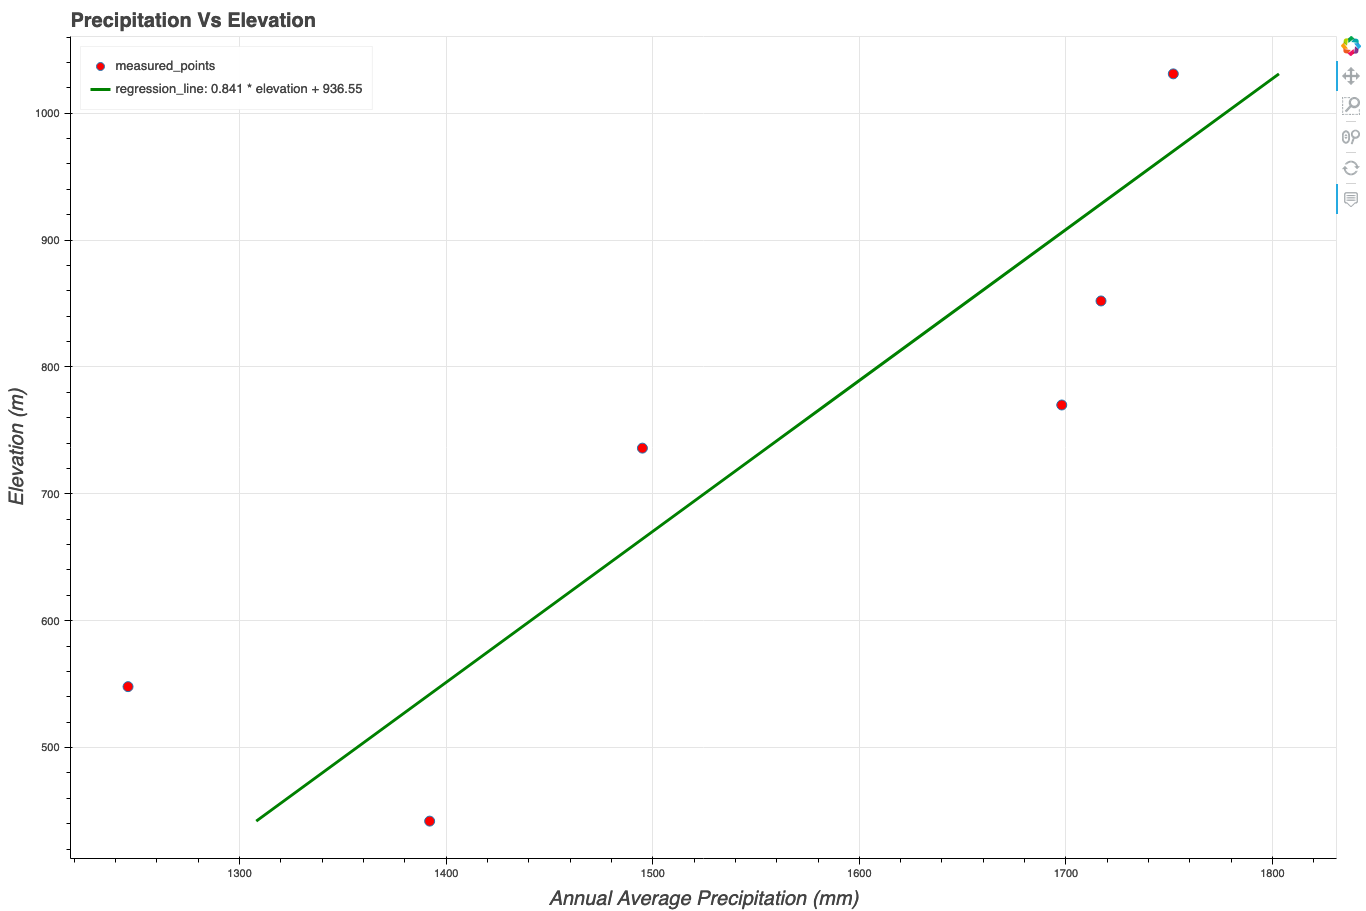

In [9]:
fig = initialize_fig(title = 'Precipitation Vs Elevation',
                     x_axis_label = 'Annual Average Precipitation (mm)',
                     y_axis_label = 'Elevation (m)',
                     tooltips = [
                         ('precipitation', '$x'),
                         ('elevation',     '$y'),
                     ],
                     plot_height = 200,
                    )

fig.title.text_font_size = '15pt'
fig.xaxis.axis_label_text_font_size = '15pt'
fig.yaxis.axis_label_text_font_size = '15pt'
# fig.xaxis.ticker.desired_num_ticks = len(np.unique(df.index.to_series().dt.year))
fig.circle(_df.precip, _df.elevation, fill_color='red', size=10, legend_label='measured_points')
# fig.line(_df.precip, _df.elevation, line_width=3, line_color='blue', legend_label='line_connect')
fig.line(line_eqn_y, _df.elevation, line_width=3, line_color='green', legend_label=f'regression_line: {line_eqn}')
fig.legend.location = 'top_left'
fig.legend.click_policy='hide'

bp.show(fig)

export_png(fig, filename=f'{BASE_DIR}/precip_vs_elevation.png', height=200, width=300)
Image(f'{BASE_DIR}/precip_vs_elevation.png')


In [10]:
for elev_data in area_elv_data:
    min_height = elev_data['elevation_min']
    max_height = elev_data['elevation_max']
    mid_height = (min_height + max_height) / 2
    mid_calc_precip = m * mid_height + c
    elev_data['mid_height'] = round(mid_height, 3)
    elev_data['mid_calc_precip'] = round(mid_calc_precip, 3)

area_elv_data


[{'elevation_min': 311,
  'elevation_max': 400,
  'area_fraction': 0.028,
  'mid_height': 355.5,
  'mid_calc_precip': 1235.36},
 {'elevation_min': 400,
  'elevation_max': 600,
  'area_fraction': 0.159,
  'mid_height': 500.0,
  'mid_calc_precip': 1356.817},
 {'elevation_min': 600,
  'elevation_max': 800,
  'area_fraction': 0.341,
  'mid_height': 700.0,
  'mid_calc_precip': 1524.924},
 {'elevation_min': 800,
  'elevation_max': 1000,
  'area_fraction': 0.271,
  'mid_height': 900.0,
  'mid_calc_precip': 1693.031},
 {'elevation_min': 1000,
  'elevation_max': 1200,
  'area_fraction': 0.151,
  'mid_height': 1100.0,
  'mid_calc_precip': 1861.138},
 {'elevation_min': 1200,
  'elevation_max': 1400,
  'area_fraction': 0.042,
  'mid_height': 1300.0,
  'mid_calc_precip': 2029.245},
 {'elevation_min': 1400,
  'elevation_max': 1600,
  'area_fraction': 0.008,
  'mid_height': 1500.0,
  'mid_calc_precip': 2197.352}]

In [11]:
# for hypsometric curve

area_elv_list = []

for index, elev_data in enumerate(area_elv_data):
    if index == 0:
        data_point_1 = [0.0, elev_data['elevation_min']] # [area, elevation]
#         data_point_2 = [round(elev_data['area_fraction'] * basin_area, 3), elev_data['elevation_max']]
        data_point_2 = [round(elev_data['area_fraction'] * 100, 3), elev_data['elevation_max']] # area in percentage
        area_elv_list.append(data_point_1)
        area_elv_list.append(data_point_2)
    else:
        prev_area = area_elv_data[:index]
        area_frac_list = [sub['area_fraction'] for sub in prev_area]
        area_frac = sum(area_frac_list) + elev_data['area_fraction']
#         data_point = [round(area_frac * basin_area, 3), elev_data['elevation_max']]
        data_point = [round(area_frac * 100, 3), elev_data['elevation_max']]
        area_elv_list.append(data_point)

area_elv_list

[[0.0, 311],
 [2.8, 400],
 [18.7, 600],
 [52.8, 800],
 [79.9, 1000],
 [95.0, 1200],
 [99.2, 1400],
 [100.0, 1600]]

In [12]:
df1 = pd.DataFrame(area_elv_data)
df1

,elevation_min,elevation_max,area_fraction,mid_height,mid_calc_precip
0,311,400,0.028,355.5,1235.360
1,400,600,0.159,500.0,1356.817
2,600,800,0.341,700.0,1524.924
3,800,1000,0.271,900.0,1693.031
4,1000,1200,0.151,1100.0,1861.138
5,1200,1400,0.042,1300.0,2029.245
6,1400,1600,0.008,1500.0,2197.352


In [13]:
df2 = pd.DataFrame(area_elv_list, columns = ['area_percent', 'elevation'])
df2

,area_percent,elevation
0,0.0,311
1,2.8,400
2,18.7,600
3,52.8,800
4,79.9,1000
5,95.0,1200
6,99.2,1400
7,100.0,1600


In [14]:
df = pd.merge(df1, df2, how='inner', left_on='elevation_max', right_on='elevation')
df

,elevation_min,elevation_max,area_fraction,mid_height,mid_calc_precip,area_percent,elevation
0,311,400,0.028,355.5,1235.360,2.8,400
1,400,600,0.159,500.0,1356.817,18.7,600
2,600,800,0.341,700.0,1524.924,52.8,800
3,800,1000,0.271,900.0,1693.031,79.9,1000
4,1000,1200,0.151,1100.0,1861.138,95.0,1200
5,1200,1400,0.042,1300.0,2029.245,99.2,1400
6,1400,1600,0.008,1500.0,2197.352,100.0,1600


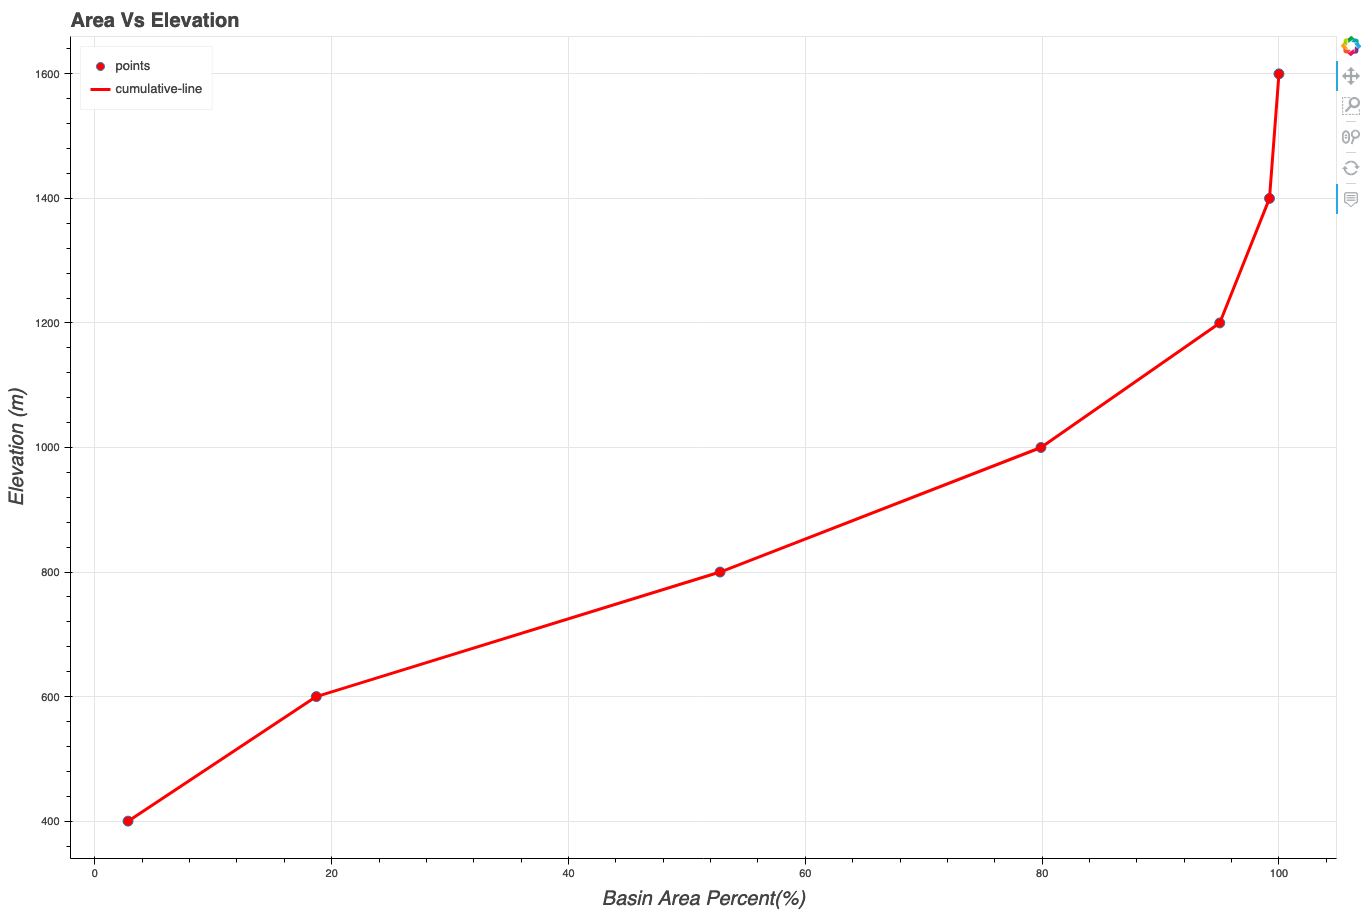

In [15]:
fig = initialize_fig(title = 'Area Vs Elevation',
                     x_axis_label = 'Basin Area Percent(%)',
                     y_axis_label = 'Elevation (m)',
                     tooltips = [
                         ('basin area', '$x'),
                         ('elevation',  '$y'),
                     ],
                     plot_height = 200,
                    )

fig.title.text_font_size = '15pt'
fig.xaxis.axis_label_text_font_size = '15pt'
fig.yaxis.axis_label_text_font_size = '15pt'
fig.circle(df.area_percent, df.elevation, fill_color='red', size=10, legend_label='points')
fig.line(df.area_percent, df.elevation, line_width=3, line_color='red', legend_label=f'cumulative-line')
fig.legend.location = 'top_left'
fig.legend.click_policy='hide'
bp.show(fig)

export_png(fig, filename=f'{BASE_DIR}/hypsometric_curve.png', height=200, width=300)
Image(f'{BASE_DIR}/hypsometric_curve.png')


In [16]:
df['area_temp'] = df.area_percent * basin_area / 100.
df

,elevation_min,elevation_max,area_fraction,mid_height,mid_calc_precip,area_percent,elevation,area_temp
0,311,400,0.028,355.5,1235.360,2.8,400,7.532
1,400,600,0.159,500.0,1356.817,18.7,600,50.303
2,600,800,0.341,700.0,1524.924,52.8,800,142.032
3,800,1000,0.271,900.0,1693.031,79.9,1000,214.931
4,1000,1200,0.151,1100.0,1861.138,95.0,1200,255.550
5,1200,1400,0.042,1300.0,2029.245,99.2,1400,266.848
6,1400,1600,0.008,1500.0,2197.352,100.0,1600,269.000


In [17]:
actual_area = []
for index, row in df.iterrows():
    if index == 0:
        area = row.area_temp
#         area = area / basin_area
    else:
        row_ = df.iloc[[index - 1]]
        area = row.area_temp - row_.area_temp.values[0]
#         area = area / basin_area

    actual_area.append(area)

df['area'] = actual_area
df

,elevation_min,elevation_max,area_fraction,mid_height,mid_calc_precip,area_percent,elevation,area_temp,area
0,311,400,0.028,355.5,1235.360,2.8,400,7.532,7.532
1,400,600,0.159,500.0,1356.817,18.7,600,50.303,42.771
2,600,800,0.341,700.0,1524.924,52.8,800,142.032,91.729
3,800,1000,0.271,900.0,1693.031,79.9,1000,214.931,72.899
4,1000,1200,0.151,1100.0,1861.138,95.0,1200,255.550,40.619
5,1200,1400,0.042,1300.0,2029.245,99.2,1400,266.848,11.298
6,1400,1600,0.008,1500.0,2197.352,100.0,1600,269.000,2.152


In [18]:
average_precip = np.sum((df.area * 1e12) * df.mid_calc_precip) / (basin_area * 1e12)

In [19]:
average_precip

1612.973412

In [20]:
# Arithmetic Average

In [21]:
G = len(precip_data)
G

6

In [22]:
average_precip2 = np.sum(_df.precip) / G

In [23]:
average_precip2

1550.0